In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import math
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

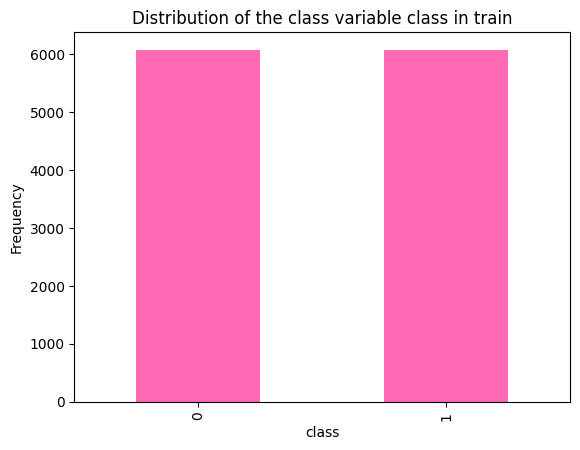

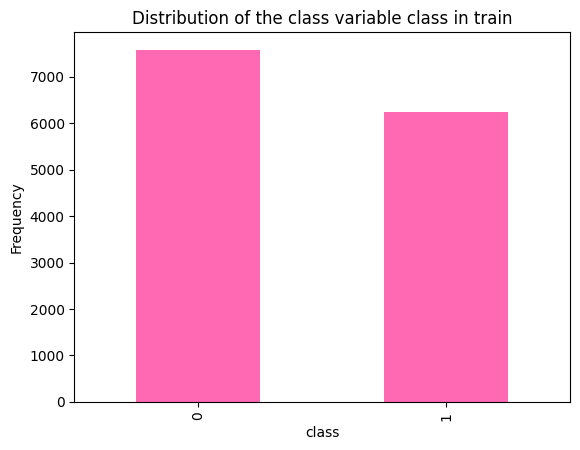

In [26]:
train = pd.read_csv('data/pcl_df_train_train_aug.csv')
validation = pd.read_csv('data/pcl_df_train_dev_preprocessed.csv')
test = pd.read_csv('data/pcl_df_dev_preprocessed.csv')
# plot the distribution of the target variable class in train
train['class'].value_counts().plot(kind='bar', color = 'hotpink')
plt.title('Distribution of the class variable class in train')
plt.xlabel('class')
plt.ylabel('Frequency')
plt.show()


# concatenate train and validation
train = pd.concat([train, validation], axis=0)
train.shape
train['class'].value_counts().plot(kind='bar', color = 'hotpink')
plt.title('Distribution of the class variable class in train')
plt.xlabel('class')
plt.ylabel('Frequency')
plt.show()


Results for Naive Bayes
Accuracy: 0.8424068767908309
F1 score: 0.31535269709543573


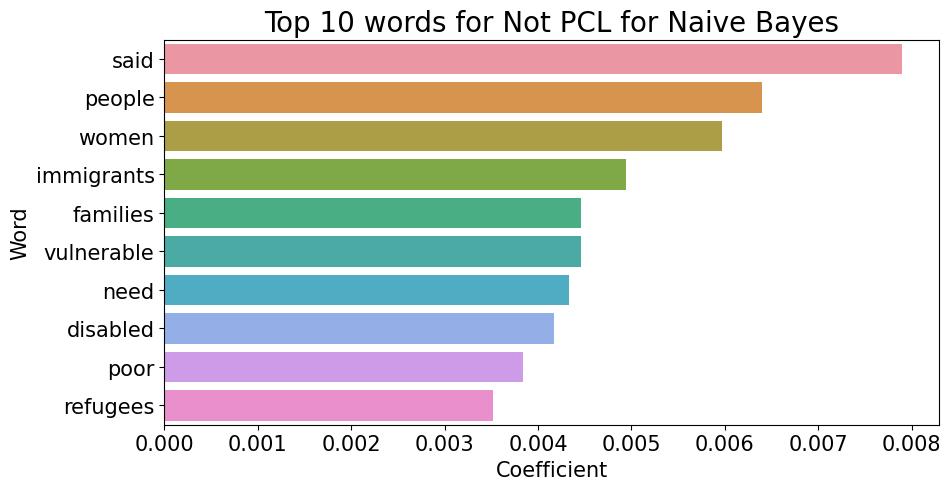

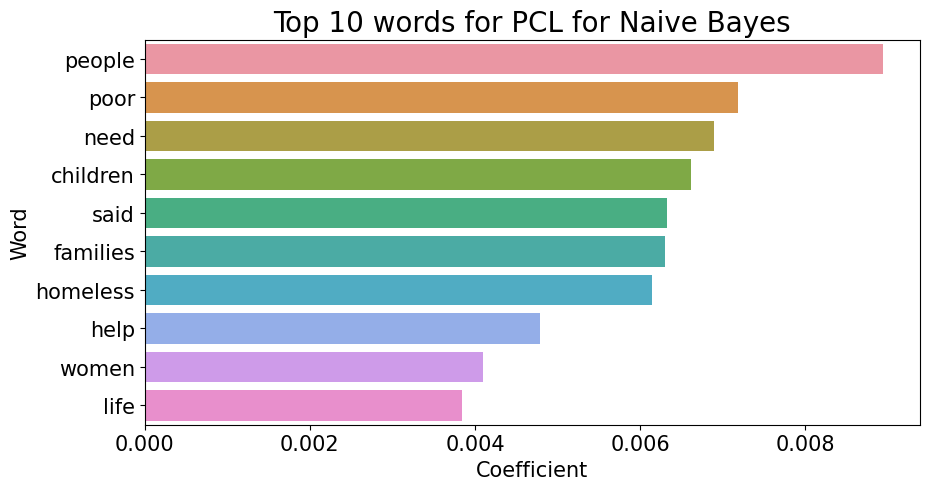

In [29]:
# Trying Baseline classifiers using BoW

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
import seaborn as sns


X_train = train['text']
y_train = train['class']

X_test = test['text']
y_test = test['class']

# Create a Bag of Words model
vectorizer = CountVectorizer(stop_words='english') 
train_features = vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
NB = MultinomialNB()
NB.fit(train_features, y_train)

# Make predictions on the test set
predictions = NB.predict(test_features)

# Print the accuracy score
print('Results for Naive Bayes')
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 score:', f1_score(y_test, predictions))
# Extract the probabilities of the classifier
probs = NB.predict_proba(test_features)
probs_df = pd.DataFrame(probs, columns = NB.classes_)
probs_df['label'] = y_test 
probs_df['prediction'] = predictions
probs_df['text'] = X_test
probs_df['misclassified'] = probs_df.apply(lambda x: 1 if x['label'] != x['prediction'] else 0, axis=1)
probs_df.to_csv('probs_niave_bayes_df.csv', index=False)

# consider the conditional probabilities learnt by the model to see which words are the most influential for each class
# # Extract the coefficients to get the words that are most influential for each class and plot 
coef = NB.feature_log_prob_
coef_df = pd.DataFrame(coef, columns = vectorizer.get_feature_names_out())
coef_df['class'] = [0, 1]
coef_df = coef_df.melt(id_vars=['class'], var_name='word', value_name='coef')
coef_df['coef'] = np.exp(coef_df['coef']) # convert log probabilities to probabilities 
# coef_df = coef_df.sort_values(by=['class', 'coef'], ascending=False)


# set color palette 
sns.set_palette("Set2")

# Plot the top 10 words for each class
# top 10 words for class 0, sort the values by class and coefficient for class 0 and plot the top 10 words

coef_df[coef_df['class'] == 0].sort_values(by='coef', ascending=False).head(10)
# plot top 10 in a bar chart
plt.figure(figsize=(10, 5))
# increase font size of axis titles
sns.barplot(x='coef', y='word', data=coef_df[coef_df['class'] == 0].sort_values(by='coef', ascending=False).head(10))


plt.title('Top 10 words for Not PCL for Naive Bayes', fontsize=20)
plt.xlabel('Coefficient', fontsize=15)
plt.ylabel('Word', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# same for class 1
coef_df[coef_df['class'] == 1].sort_values(by='coef', ascending=False).head(10)
# plot top 10 in a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='coef', y='word', data=coef_df[coef_df['class'] == 1].sort_values(by='coef', ascending=False).head(10))
plt.title('Top 10 words for PCL for Naive Bayes', fontsize = 20)
plt.xlabel('Coefficient', fontsize=15)
plt.ylabel('Word', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()








 predicted 0, correct 1
It 's calculated that over 204,000 days of purpose-built residential accommodation to otherwise potentially homeless elderly men and women have been delivered by this personally driven altruistic act alone .
 predicted 1, correct 0
"As she descended into a state of hopelessness , she decided to do "" one hopeful thing "" . She bought a Golden Retriever puppy called Bunker . Little did she know how much solace he would provide ..."
Number of misclassified examples: 330
percentage with label 0 that are misclassfied out of the total number of examples with label 0: 0.10923482849604221
percentage with label 1 that are misclassfied out of the total number of examples with label 1: 0.6180904522613065


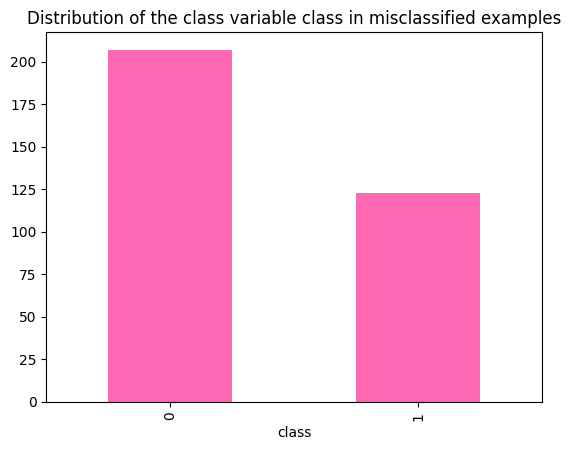

In [30]:


misclassified = probs_df[probs_df['misclassified'] == 1]
# get examples of misclassified text, where the model predicted class 0 but the true label is class 1
misclassified_pred_0 = misclassified[misclassified['prediction'] == 0].head(10)
# get examples of misclassified text, where the model predicted class 1 but the true label is class 0
misclassified_pred_1 = misclassified[misclassified['prediction'] == 1].head(10)


# get random text example from misclassified_pred_0 
print(" predicted 0, correct 1")
print(misclassified_pred_0['text'].sample(1).values[0])
# get random text example from misclassified_pred_1
print(" predicted 1, correct 0")
print(misclassified_pred_1['text'].sample(1).values[0])


# plot the labels in the misclassified examples
misclassified['label'].value_counts().plot(kind='bar', color = 'hotpink')
plt.title('Distribution of the class variable class in misclassified examples')
plt.xlabel('class')

print(f'Number of misclassified examples: {misclassified.shape[0]}')
print(f'percentage with label 0 that are misclassfied out of the total number of examples with label 0: {misclassified[misclassified["label"] == 0].shape[0]/y_test[y_test == 0].shape[0]}')
print(f'percentage with label 1 that are misclassfied out of the total number of examples with label 1: {misclassified[misclassified["label"] == 1].shape[0]/y_test[y_test == 1].shape[0]}')

Results for Logistic Regression
Accuracy: 0.8638968481375359
F1 score: 0.32304038004750596


C:\Users\priya\AppData\Local\Temp\ipykernel_29284\2208455343.py:22: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  weights_df = weights_df.melt(var_name='word', value_name='weight')


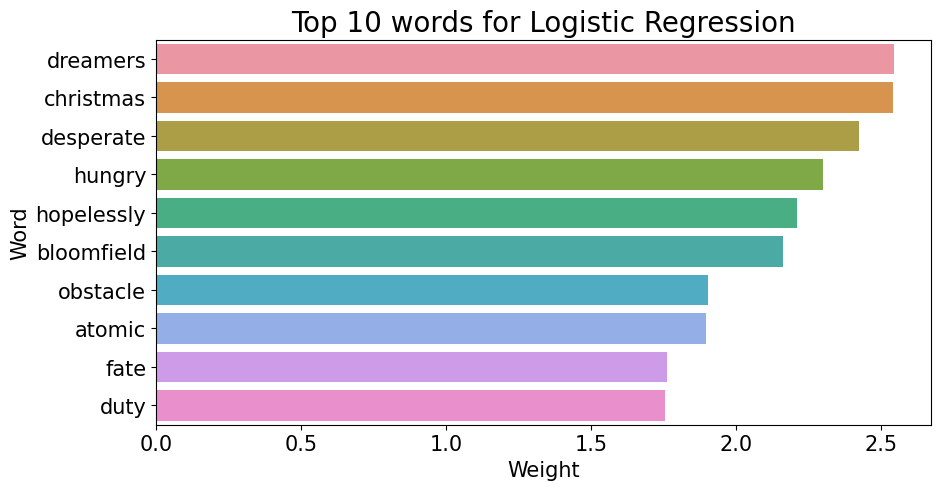

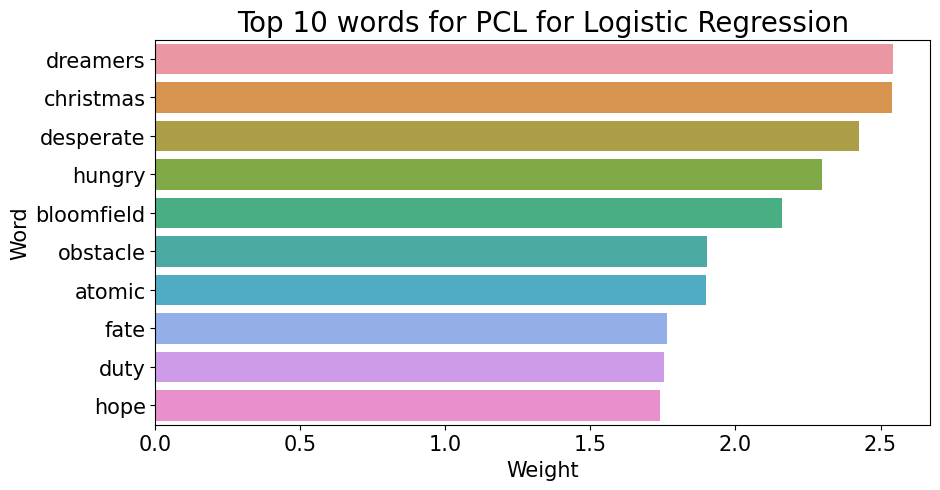

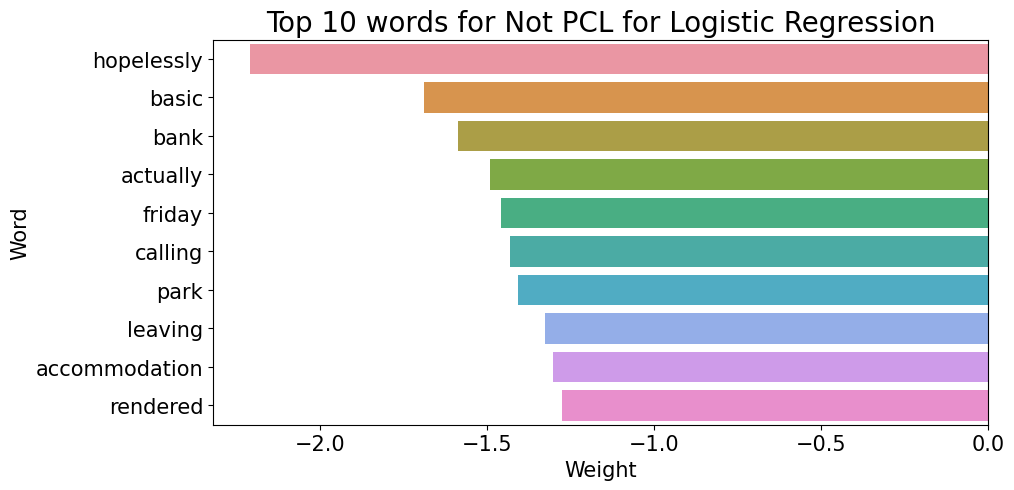

In [31]:
# Train a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(train_features, y_train)

# Make predictions on the test set
predictions = clf.predict(test_features)
# set color palette 
sns.set_palette("Set2")


# Print the accuracy score
print('Results for Logistic Regression')
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 score:', f1_score(y_test, predictions))




# Extract the learned weights and see which words have weights with a highest magnitude
weights = clf.coef_
weights_df = pd.DataFrame(weights, columns = vectorizer.get_feature_names_out())
weights_df = weights_df.melt(var_name='word', value_name='weight')
weights_df['magnitude'] = np.abs(weights_df['weight'])
weights_df = weights_df.sort_values(by='magnitude', ascending=False)
weights_df.head(10)
#plot top 10 in a bar chart with the highest magnitude of weights
plt.figure(figsize=(10, 5))
sns.barplot(x='magnitude', y='word', data=weights_df.head(10))
plt.title('Top 10 words for Logistic Regression', fontsize = 20)
plt.xlabel('Weight', fontsize=15)
plt.ylabel('Word', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


# top 10 words for class 0, sort the values by class and coefficient for class 0 and plot the top 10 words
weights_df = weights_df.sort_values(by='weight', ascending=False)
weights_df.head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='weight', y='word', data=weights_df.head(10))
plt.title('Top 10 words for PCL for Logistic Regression', fontsize = 20)
plt.xlabel('Weight', fontsize=15)
plt.ylabel('Word', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()


weights_df = weights_df.sort_values(by='weight', ascending=True)
weights_df.head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='weight', y='word', data=weights_df.head(10))
plt.title('Top 10 words for Not PCL for Logistic Regression', fontsize = 20)
plt.xlabel('Weight', fontsize=15)
plt.ylabel('Word', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
    


# print a sentence example with the word "bloomfield" in the text


 predicted 0, correct 1
It 's calculated that over 204,000 days of purpose-built residential accommodation to otherwise potentially homeless elderly men and women have been delivered by this personally driven altruistic act alone .
 predicted 1, correct 0
Mary Kay is one of the world 's largest direct selling companies with more than $3 billion in annual wholesale sales worldwide . Mary Kay was founded in 1963 by Mary Kay Ash with the goal of helping women achieve personal growth and financial success . Mary Kay remains committed to enriching women 's lives , and today more than 2.4 million people of all backgrounds are enjoying the advantages of being Mary Kay Independent Beauty Consultants . Mary Kay 's high-quality skin care and color cosmetic products are sold in more than 35 countries around the world . To learn more about Mary Kay , visit www.marykay.co.in
Number of misclassified examples: 285
Percentage of Misclassified examples that have label 0 (Not PCL): 0.5403508771929825
Pe

Text(0.5, 0, 'class')

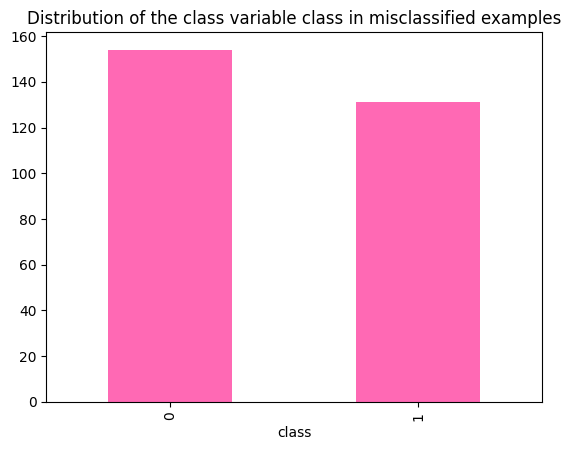

In [32]:



# dataframe with text, label, prediction
misclassification_df = pd.DataFrame({'text': X_test, 'label': y_test, 'prediction': predictions})
misclassification_df['misclassified'] = misclassification_df.apply(lambda x: 1 if x['label'] != x['prediction'] else 0, axis=1)
misclassification_df = misclassification_df[misclassification_df['misclassified'] == 1]



# get examples of misclassified text, where the model predicted class 0 but the true label is class 1
misclassified_pred_0 = misclassification_df[misclassification_df['prediction'] == 0].head(10)
# get examples of misclassified text, where the model predicted class 1 but the true label is class 0
misclassified_pred_1 = misclassification_df[misclassification_df['prediction'] == 1].head(10)


# get random text example from misclassified_pred_0 
print(" predicted 0, correct 1")
print(misclassified_pred_0['text'].sample(1).values[0])
# get random text example from misclassified_pred_1
print(" predicted 1, correct 0")
print(misclassified_pred_1['text'].sample(1).values[0])

print(f'Number of misclassified examples: {misclassification_df.shape[0]}')
print(f'Percentage of Misclassified examples that have label 0 (Not PCL): {misclassification_df[misclassification_df["label"] == 0].shape[0]/misclassification_df.shape[0]}')
print(f'Percentage of Misclassified examples that have label 1 (PCL): {misclassification_df[misclassification_df["label"] == 1].shape[0]/misclassification_df.shape[0]}')

print(f'percentage with label 0 that are misclassfied out of the total number of examples with label 0: {misclassification_df[misclassification_df["label"] == 0].shape[0]/y_test[y_test == 0].shape[0]}')
print(f'percentage with label 1 that are misclassfied out of the total number of examples with label 1: {misclassification_df[misclassification_df["label"] == 1].shape[0]/y_test[y_test == 1].shape[0]}')
# plot the labels in the misclassified examples
misclassification_df['label'].value_counts().plot(kind='bar', color = 'hotpink')
plt.title('Distribution of the class variable class in misclassified examples')
plt.xlabel('class')
